# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: Mariana Villalobos Vargas

In [1]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [2]:
print('Shape: ',df.shape) #Tamaño
print('Columnas: ', df.columns) #Columnas
print('Tipado: \n', df.dtypes) #Tipos

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [3]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()
print ('Shape', df.shape)

Shape (72, 3)


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

<function matplotlib.pyplot.show(close=None, block=None)>

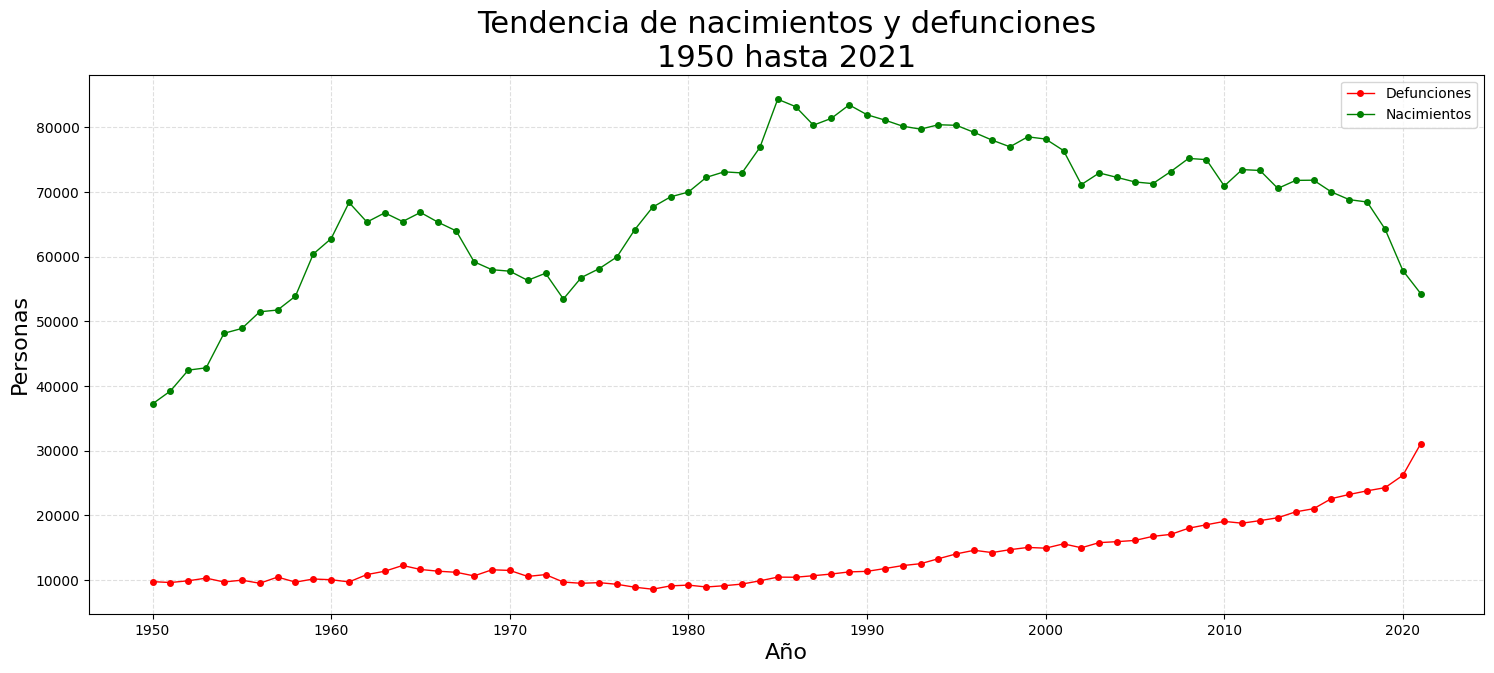

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7)) #Para definir el tamaño (largo, altura)

plt.grid(linestyle = '--', alpha=0.4) #Cuadriculado del fondo y transparencia.

plt.title(f"Tendencia de nacimientos y defunciones\n{df['Año'].min()} hasta {df['Año'].max()}", fontsize=22)
plt.xlabel("Año", fontsize=16)
plt.ylabel('Personas', fontsize=16)
plt.plot(df['Año'],df['Defunciones'], marker='o', markersize='4', lw=1, color='red', label='Defunciones') #lw es linewidth
plt.plot(df['Año'],df['Nacimientos'], marker='o', markersize='4', lw=1, color='green', label='Nacimientos')#Le doy el formato y asigno etiquetas
plt.legend() #Dibujo el label del plot

plt.show


### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [5]:
# Seleccionar las columnas de Año y Nacimientos

filtro = ['Año', 'Nacimientos']
#df[filtro]
df[filtro]
#Es lo mismo que df[['Año','Nacimientos']], doble corchete cuadrado

,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157
...,...,...
67,2017,68811
68,2018,68449
69,2019,64274
70,2020,57848


In [6]:
# Filtrar datos desde el año 2010
df_filtrado = df[df['Año']>=2010]
#df.loc[df['Año']>=2010]
df_filtrado

,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [7]:
# total_nacimientos. Son números, puedo sumarlos.

total_nacimientos=df['Nacimientos'].sum()

# total_defunciones 

total_defunciones=df['Defunciones'].sum()

print (f'El total de nacimientos es {total_nacimientos} y el total de defunciones es {total_defunciones}.')

El total de nacimientos es 4846207 y el total de defunciones es 975501.


**2\. Añadir una nueva columna con el saldo poblacional :**

In [8]:
#Saldo Poblacional
df['Saldo_poblacional']= df['Nacimientos']-df['Defunciones'] #Hago una columna nueva restando dos números
df

,Año,Nacimientos,Defunciones,Saldo_poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444
...,...,...,...,...
67,2017,68811,23246,45565
68,2018,68449,23806,44643
69,2019,64274,24292,39982
70,2020,57848,26205,31643


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

In [9]:
import matplotlib.pyplot as plt
anio_inicial= int(input('Ingrese el año inicial: '))
anio_final= int(input('Ingrese el año final: '))
#df >= anio_inicial and <= anio_final
df_rango_anios= df[(df['Año']>= anio_inicial) & (df['Año'] <= anio_final)] #DF entre [], pero le pido filas entre (). Uso & por ser Series o Data Frames.
df_rango_anios

,Año,Nacimientos,Defunciones,Saldo_poblacional
10,1960,62794,10063,52731
11,1961,68377,9726,58651
12,1962,65349,10861,54488
13,1963,66776,11376,55400
14,1964,65433,12269,53164
15,1965,66836,11649,55187
16,1966,65300,11379,53921
17,1967,63979,11214,52765
18,1968,59213,10653,48560
19,1969,57984,11599,46385


### **Gráfico de barras: Comparación de nacimientos y defunciones**

<function matplotlib.pyplot.show(close=None, block=None)>

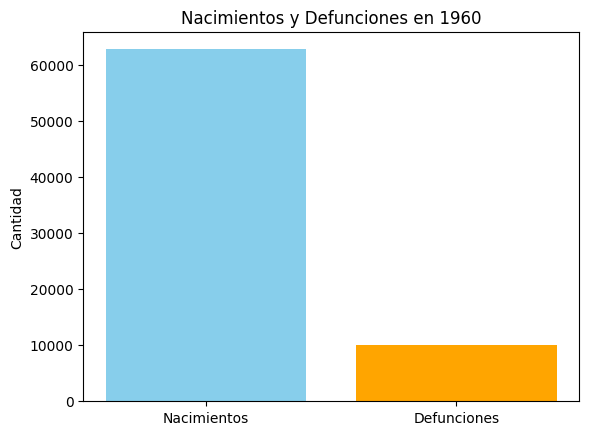

In [10]:
# Crear gráfico de barras
import matplotlib.pyplot as plt

anio_filtrado= int(input('Ingrese a graficar: '))

df_rango_anios= df[df['Año']== anio_filtrado]
valores=df_rango_anios['Nacimientos'].values[0], df_rango_anios['Defunciones'].values[0]
plt.bar(['Nacimientos', 'Defunciones'], valores, color=['skyblue', 'orange'])
plt.title(f'Nacimientos y Defunciones en {df_rango_anios['Año'].values[0]}')
plt.ylabel('Cantidad')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

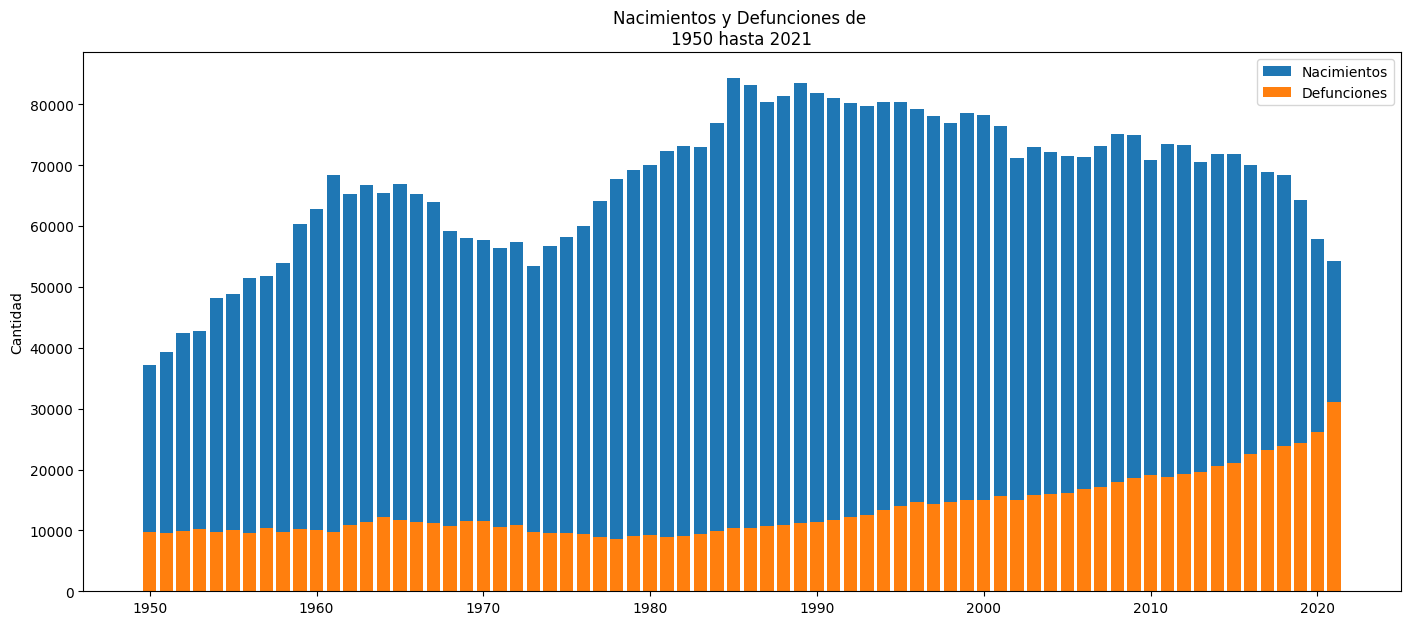

In [23]:
plt.figure(figsize=(17,7))
plt.bar(df['Año'], df['Nacimientos'], label='Nacimientos')
plt.bar(df['Año'], df['Defunciones'], label='Defunciones')
plt.legend()
plt.title(f'Nacimientos y Defunciones de \n{df['Año'].min()} hasta {df['Año'].max()}')
plt.ylabel('Cantidad')

plt.show

In [24]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]
ultimo_anio


# Crear gráfico de barras



,Año,Nacimientos,Defunciones,Saldo_poblacional
71,2021,54288,31093,23195


### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [26]:
df_filtrado= df[df['Año']>=2000]
df_filtrado.head()


,Año,Nacimientos,Defunciones,Saldo_poblacional
50,2000,78178,14944,63234
51,2001,76401,15609,60792
52,2002,71144,15004,56140
53,2003,72938,15800,57138
54,2004,72247,15949,56298


2. **Calcular promedios:**

In [29]:
#df_filtrado= df[(df['Año']>=1950) & (df['Año]<2021)] Para rango

df_filtrado= df[df['Año']>=2010]
promedio_nacimientos= df_filtrado['Nacimientos'].mean()
promedio_defunciones= df_filtrado['Defunciones'].mean()
print (f'El promedio de nacimientos a partir del 2010 es de {promedio_nacimientos:.2f}.')

print (f'El promedio de defunciones a partir del 2010 es de {promedio_defunciones:.2f}.')

El promedio de nacimientos a partir del 2010 es de 67961.92.
El promedio de defunciones a partir del 2010 es de 22463.75.


3. **Graficar:**

C:\Users\alme_\AppData\Local\Temp\ipykernel_33708\1916891826.py:10: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.pie(data, [0,0.2], eje_x, color, autopct='%1.1f%%', startangle=90)


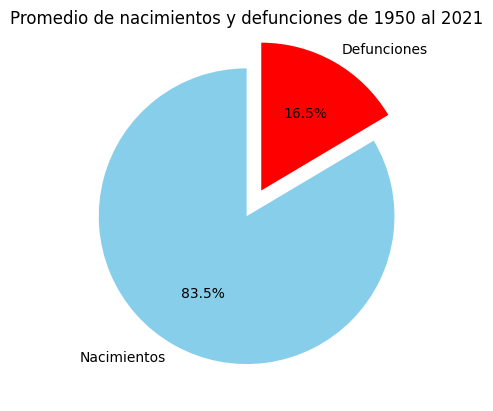

In [37]:
df_filtrado= df[(df['Año']>=1950) & (df['Año']<2021)]

promedio_nacimientos= df_filtrado['Nacimientos'].mean()
promedio_defunciones= df_filtrado['Defunciones'].mean()
eje_x=['Nacimientos', 'Defunciones'] #etiquetas
data= [promedio_nacimientos,promedio_defunciones]

color=['skyblue','red']

plt.pie(data, [0,0.2], eje_x, color, autopct='%1.1f%%', startangle=90)
plt.title (f'Promedio de nacimientos y defunciones de 1950 al 2021')
plt.show()